## データビリティコンソーシアム eラーニング講座：AIを体系的に学ぶ
## 知識情報学（第2回）識別(1) 木構造による学習
- MIT License

## 演習：決定木，Random Forestによる識別と重要度の算出

In [7]:
%matplotlib inline
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

In [8]:
# テストデータの割合
test_proportion = 0.3
# Iris データセットをロード
iris = datasets.load_iris()
# 特徴ベクトルを取得
X = iris.data
# クラスラベルを取得
y = iris.target

### 学習データとテストデータに分割

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_proportion, random_state = 1)

### 【オンライン演習1】  エントロピーを指標とする決定木のインスタンスを生成し，決定木のモデルに学習データを適合させる
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [10]:
#決定木のインスタンス生成
tree= DecisionTreeClassifier(criterion='entropy')
#学習データに適合
trained_model = tree.fit(X_train, y_train)

### 得られた決定木の描画

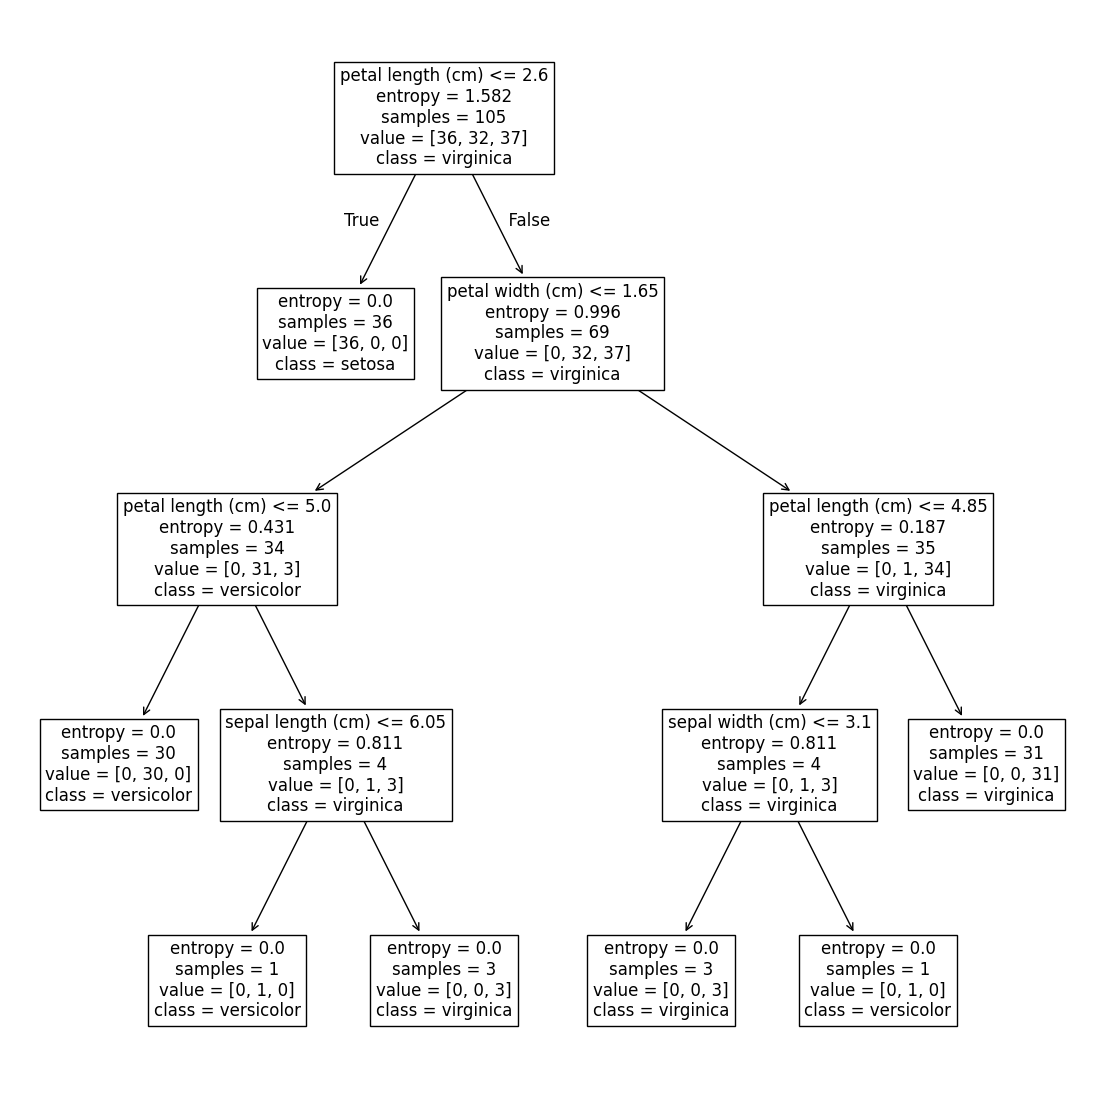

In [11]:
# 木の大きさや環境に合わせてfigsizeやfontsizeを調整してください
plt.figure(figsize=[14,14])
plot_tree(trained_model,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          fontsize=12)
plt.show()

### 【オンライン演習2】 学習した決定木を用いて学習データおよびテストデータのクラスを予測し，結果をy_train_predicted, y_test_predictedに格納する

In [12]:
y_train_predicted = tree.predict(X_train)
y_test_predicted = tree.predict(X_test)

### 【オンライン演習3】 関数precision_recall_fscore_supportを使用して，学習データおよびテストデータに対するprecision，recall，F値の算出しfscore_train, fscore_testに格納する
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

In [13]:
fscore_train = precision_recall_fscore_support(y_train, y_train_predicted)
fscore_test = precision_recall_fscore_support(y_test, y_test_predicted)

### 平均precision, recall, F値の算出

In [14]:
print('Training data')
print('Class 0 Precision: %.3f, Recall: %.3f, Fscore: %.3f' %
      (fscore_train[0][0], fscore_train[1][0], fscore_train[2][0]))
print('Class 1 Precision: %.3f, Recall: %.3f, Fscore: %.3f' %
      (fscore_train[0][1], fscore_train[1][1], fscore_train[2][1]))
print('Class 2 Precision: %.3f, Recall: %.3f, Fscore: %.3f' %
      (fscore_train[0][2], fscore_train[1][2], fscore_train[2][2]))
print('Average Precision: %.3f, Recall: %.3f, Fscore: %.3f' %
      (np.average(fscore_train[0]),
       np.average(fscore_train[1]),
       np.average(fscore_train[2])))

print('Test data')
print('Class 0 Precision: %.3f, Recall: %.3f, Fscore: %.3f' %
      (fscore_test[0][0], fscore_test[1][0], fscore_test[2][0]))
print('Class 1 Precision: %.3f, Recall: %.3f, Fscore: %.3f' %
      (fscore_test[0][1], fscore_test[1][1], fscore_test[2][1]))
print('Class 2 Precision: %.3f, Recall: %.3f, Fscore: %.3f' %
      (fscore_test[0][2], fscore_test[1][2], fscore_test[2][2]))
print('Average Precision: %.3f, Recall: %.3f, Fscore: %.3f' %
      (np.average(fscore_test[0]),
       np.average(fscore_test[1]),
       np.average(fscore_test[2])))

Training data
Class 0 Precision: 1.000, Recall: 1.000, Fscore: 1.000
Class 1 Precision: 1.000, Recall: 1.000, Fscore: 1.000
Class 2 Precision: 1.000, Recall: 1.000, Fscore: 1.000
Average Precision: 1.000, Recall: 1.000, Fscore: 1.000
Test data
Class 0 Precision: 1.000, Recall: 1.000, Fscore: 1.000
Class 1 Precision: 0.944, Recall: 0.944, Fscore: 0.944
Class 2 Precision: 0.923, Recall: 0.923, Fscore: 0.923
Average Precision: 0.956, Recall: 0.956, Fscore: 0.956


## Random Forestによる識別
### 【オンライン演習4】 全データに対してクロスバリデーションを行い，テストデータに対する平均Accuracyを算出
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [15]:
rf = RandomForestClassifier()
score = cross_val_score(rf, X, y, cv=10)
print("Average accuracy:", np.average(score))

Average accuracy: 0.96


### 【提出課題】 全データに対してRandom Forestにより学習を行い，特徴量の重要度を算出し棒グラフにプロット
- ヒント：特徴量の名称はiris.feature_namesに格納されています

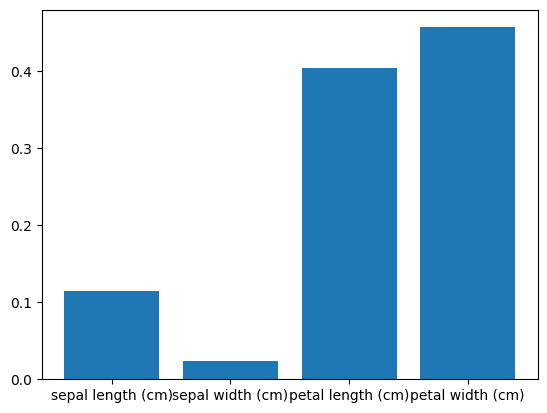

In [16]:
# 全データに対してRandom Forestを適合
trained_model_rf = rf.fit(X, y)
# 重要度の算出
importances = trained_model_rf.feature_importances_
# 棒グラフのプロット
plt.bar(range(4), importances, tick_label=iris.feature_names)
plt.show()